# Lab | Working with APIs
### Instructions
- Select your own data you want to explore
- Working with APIs to access the data
- Explore data - try to think in terms of business, what it will bring to the client or what problem you're trying to solve


# Import libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Atmosphere methane concentration
- This API provides on a monthly basis, the amount of methane in the atmosphere from 1983 to the present. Expressed as a mole fraction in dry air, parts per million (ppm).


**Note**:
- I check data from many sources. I think the dataset is reliable, the only thing that is inconsistent here is the description on the API provider's website (API source: https://rapidapi.com/rene-mdd/api/atmosphere-methane-concentration).
- As the descrption stated above: the amount of methane in the atmosphere from 1983 to the present, expressed as a mole fraction in dry air, **parts per million (ppm)**. <-- This should be **parts per billion (ppb)**

**Sources**:
- [Annual Increase in Globally-Averaged Atmospheric Methane, noaa.gov](https://gml.noaa.gov/ccgg/trends_ch4/)
- [Global Warming and Climate Change API ](https://global-warming.org/)
- [Greenhouse gas concentrations, climate.copernicus.eu
](https://climate.copernicus.eu/ESOTC/2019/greenhouse-gas-concentrations)

In [2]:
# Make a request via API
url = "https://atmosphere-methane-concentration.p.rapidapi.com/api/methane-api"

headers = {"X-RapidAPI-Key": "72e420e6ddmshc3015daa82e4145p134908jsnfb8cb13e8efb",
           "X-RapidAPI-Host": "atmosphere-methane-concentration.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

# Create a json
myjson = response.json()
# myjson

In [3]:
# Loop through a dictionary in the json & put into the "mydata" list
mydata = []

for x in myjson['methane']:
    data_list = [x['date'], x['average'], x['trend'], x['averageUnc'], x['trendUnc']]
    mydata.append(data_list)

In [4]:
# Put data into pandas dataframe
df = pd.DataFrame(data = mydata,
                  columns = ['year', 'decimal', 'average_unc', 'average', 'trend'])
df.head()

,year,decimal,average_unc,average,trend
0,#.year,decimal,average_unc,average,trend
1,1983.7,1625.91,1635.11,2.10,1.39
2,1983.8,1628.07,1635.64,2.69,1.33
3,1983.9,1638.43,1636.22,2.33,1.27
4,1983.10,1644.79,1636.85,1.59,1.20


In [5]:
# Drop the firt row of data (it's the column name)
df = df.tail(-1) 
df

,year,decimal,average_unc,average,trend
1,1983.7,1625.91,1635.11,2.10,1.39
2,1983.8,1628.07,1635.64,2.69,1.33
3,1983.9,1638.43,1636.22,2.33,1.27
4,1983.10,1644.79,1636.85,1.59,1.20
5,1983.11,1642.62,1637.55,0.78,1.12
...,...,...,...,...,...
472,2022.10,1920.04,1916.39,-9.99,-9.99
473,2022.11,1923.77,1917.44,-9.99,-9.99
474,2022.12,1924.71,1918.43,-9.99,-9.99
475,2023.1,1921.69,1919.39,-9.99,-9.99


In [6]:
# Check NaN and emptyspace
print('NaN (n rows): ', '\n', df.isna().sum())
print('\n', 'Emptyspace (n rows): ', '\n', df.eq(' ').sum())

NaN (n rows):  
 year           0
decimal        0
average_unc    0
average        0
trend          0
dtype: int64

 Emptyspace (n rows):  
 year           0
decimal        0
average_unc    0
average        0
trend          0
dtype: int64


In [7]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 1 to 476
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         476 non-null    object
 1   decimal      476 non-null    object
 2   average_unc  476 non-null    object
 3   average      476 non-null    object
 4   trend        476 non-null    object
dtypes: object(5)
memory usage: 18.7+ KB


In [8]:
### Correct data types

# Convert string to datetime type
df['date'] = pd.to_datetime(df['year'])

# Convert string to float
df_num = df[['decimal', 'average_unc', 'average', 'trend']]
df_num = df_num.astype(float)

# Put coverted data into a dataframe
df = pd.concat([df['date'], df_num], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 1 to 476
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         476 non-null    datetime64[ns]
 1   decimal      476 non-null    float64       
 2   average_unc  476 non-null    float64       
 3   average      476 non-null    float64       
 4   trend        476 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 18.7 KB


In [9]:
# Extract 'month' and 'year'
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month

# Rename a column decimal to ppb
df = df.rename(columns={'decimal': 'ppb'})
df.head()

,date,ppb,average_unc,average,trend,year,month
1,1983-07-01,1625.91,1635.11,2.10,1.39,1983,7
2,1983-08-01,1628.07,1635.64,2.69,1.33,1983,8
3,1983-09-01,1638.43,1636.22,2.33,1.27,1983,9
4,1983-10-01,1644.79,1636.85,1.59,1.20,1983,10
5,1983-11-01,1642.62,1637.55,0.78,1.12,1983,11


Text(0, 0.5, 'Methane Concentration (ppb)')

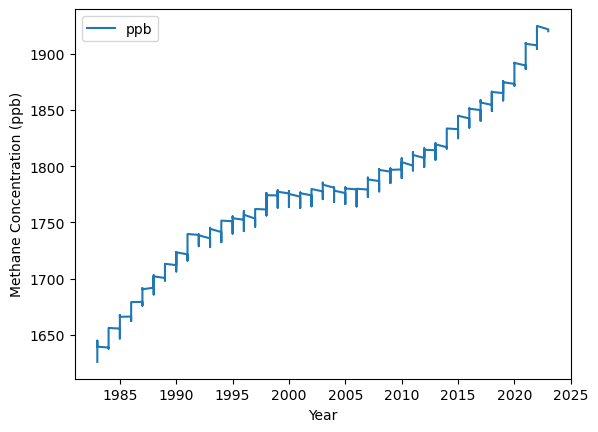

In [10]:
# Simple time-series plot
df.plot(x="year", y="ppb")

# Set x-y label & range
plt.xlabel("Year")
plt.ylabel("Methane Concentration (ppb)")

## Observe

- Trend in the first plot shows the methane level rises drastically after around 2006 similar to the trend between 1983 and 1993
- But if we look closely from the year 2020 onward, the trend gets steeper 


## What does that mean?
- I have so many questions after seeing this graph
    - What happened between 1983 and 1993? Was the economy rise drastically? Was the agriculture section expand drastically? Or what exactly did happen during those times?
    - And what happened after that (around 1990 - 2010)? Because the methane level seemed to emit less. Was there a big change in society in how they lived?
    - Then again after the year 2010, the methane level continues to rise, especially after year 2020. While the green movement gets more intention but why the methane trend is like a rocket shooting up? From which sources are they?
    - Etc.
    

## What's next?

However, since this lab is about "API". I will leave it here (for now). 

**For this lab**, the only question I want to know is that:

   - **What if the trend/human activities continue like this (since 2020) in the next 10 years?**
    
   - **How much the methane level could be in the next 10 years?**

#### References about methane & climate change
- [Methane and climate change](https://www.iea.org/reports/methane-tracker-2021/methane-and-climate-change)
- [Importance of Methane](https://www.epa.gov/gmi/importance-methane)
- [Methane emissions are driving climate change. Here’s how to reduce them.](https://www.unep.org/news-and-stories/story/methane-emissions-are-driving-climate-change-heres-how-reduce-them)

# Atmosphere methane concentration in thenext decade


In [11]:
### Create a linear plot from year 2006 to 2037 (2 decades)

# Get dataset to calculate new slope & intercept values
df_2006 = df[df['year'] >= 2006].reset_index(drop=True)

# Set new x and y
x = df_2006['year']
y = df_2006['ppb']


# Get slope & intercept values
slope, intercept, r_value, p_value, stderr = linregress(x, y)

# Set new x, y to create a line plot
x_pred = pd.Series([i for i in range(2010, 2038)])
y_pred = slope*x_pred + intercept # Following simple linear graph (y = mx + c)

# Visualize line plot
# plt.plot(x_pred, y_pred, 'black')

In [12]:
### Create a forecast line --> we need new slope & intercept values

# Get dataset to calculate new slope & intercept values
df_forecast = df[df['year'] >= 2017].reset_index(drop=True)

# Set new x and y
X_fc = df_forecast['year']
y_fc = df_forecast['ppb']

# Get slope & intercept values
slope_forecast, intercept_forecast, r_value_forecast, p_value_forecast, stderr_forecast = linregress(X_fc, y_fc)

# Set new x, y to create a line plot
x_forecast = pd.Series([i for i in range(2017, 2038)])
y_forecast = slope_forecast*x_forecast + intercept_forecast # Following simple linear graph (y = mx + c)

# Visualize line plot
# plt.plot(x_forecast, y_forecast, 'red')

(1980.3, 2040.0)

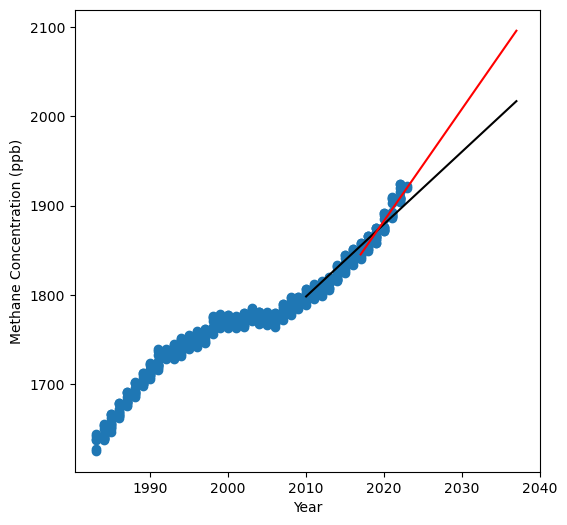

In [13]:
# All plots in the same plot
plt.figure(figsize = (6,6))

# Create a scatter plot
x = df['year']
y = df['ppb']
plt.scatter(x, y)

# Place the slope from the dataset
plt.plot(x_pred, y_pred, 'black')

# Place the forecast line 
plt.plot(x_forecast, y_forecast, 'red')

# Set x-y label & range
plt.xlabel("Year")
plt.ylabel("Methane Concentration (ppb)")
plt.xlim([None, 2040])


## Observe
- We can expect that the global methane level could exceed 2,000 ppb by the year of 2030 (7 years from now, I'm not even old yet.)

---


After seeing this plot, I also have another question:
- How close is the methane level to the change in global temperature? How are they related comparing to the amount of CO2?


Note:
- I'm done with the lab but not done in the sense of this work. 
- I find working with time-series still problematic for me. I don't understand lots of things about time-series. 
- I stumped on some article mentioned about 'lag' in the LinearRegression model which I want to understand.
- I'll work on this 'time-series' topic more. 

And here for me to read: 
- [Forecasting Atmospheric CO2 with Python](https://towardsdatascience.com/forecasting-atmospheric-co2-concentration-with-python-c4a99e4cf142)
- [Machine learning-based time series models for effective CO2 emission prediction in India](https://link.springer.com/article/10.1007/s11356-022-21723-8)

In [14]:
##### LAB CLOSED THANK YOU! 💖 #####